## Importamos librerías

In [1]:
from keras.datasets import imdb
from keras import models, layers, optimizers
import numpy as np

2024-10-23 17:35:36.771296: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Descargamos los datos de imdb - Keras

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## Función de one-hot encoding

In [3]:
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults 

## Transformamos datos

In [4]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Red neuronal original

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

## Entrenando modelo original

In [9]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 59ms/step - loss: 0.6178 - acc: 0.7531 - val_loss: 0.5086 - val_acc: 0.8391
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4345 - acc: 0.8681 - val_loss: 0.4005 - val_acc: 0.8561
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3250 - acc: 0.8993 - val_loss: 0.3247 - val_acc: 0.8792
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2578 - acc: 0.9162 - val_loss: 0.3032 - val_acc: 0.8802
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2171 - acc: 0.9263 - val_loss: 0.2858 - val_acc: 0.8865
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1881 - acc: 0.9370 - val_loss: 0.2868 - val_acc: 0.8824
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1644 - acc: 0.9450 - val_loss: 0.3020 - val_acc: 0.8807
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1442 - a

### Comparando un modelo más pequeño

In [10]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [12]:
history2 = model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 63ms/step - loss: 0.6412 - acc: 0.6101 - val_loss: 0.6022 - val_acc: 0.6404
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5634 - acc: 0.7411 - val_loss: 0.5541 - val_acc: 0.8114
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5145 - acc: 0.8179 - val_loss: 0.5198 - val_acc: 0.8258
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4785 - acc: 0.8577 - val_loss: 0.4960 - val_acc: 0.8373
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4505 - acc: 0.8815 - val_loss: 0.4846 - val_acc: 0.8227
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4275 - acc: 0.8997 - val_loss: 0.4678 - val_acc: 0.8469
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4072 - acc: 0.9149 - val_loss: 0.4611 - val_acc: 0.8493
Epoch 8/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3901 - a

## Regularización

In [14]:
from keras import regularizers

In [15]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [17]:
history3 = model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5784 - acc: 0.7812 - val_loss: 0.4497 - val_acc: 0.8693
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3810 - acc: 0.8919 - val_loss: 0.3661 - val_acc: 0.8858
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3037 - acc: 0.9154 - val_loss: 0.3395 - val_acc: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2635 - acc: 0.9276 - val_loss: 0.3307 - val_acc: 0.8901
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2372 - acc: 0.9404 - val_loss: 0.3495 - val_acc: 0.8781
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2167 - acc: 0.9486 - val_loss: 0.3929 - val_acc: 0.8647
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2057 - acc: 0.9517 - val_loss: 0.3411 - val_acc: 0.8848
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1952 - a

### Dropout

In [19]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [21]:
history4 = model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.6317 - acc: 0.6421 - val_loss: 0.5132 - val_acc: 0.8358
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5168 - acc: 0.7651 - val_loss: 0.4086 - val_acc: 0.8656
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4378 - acc: 0.8213 - val_loss: 0.3382 - val_acc: 0.8808
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3727 - acc: 0.8557 - val_loss: 0.3076 - val_acc: 0.8866
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3256 - acc: 0.8841 - val_loss: 0.2819 - val_acc: 0.8899
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2801 - acc: 0.9040 - val_loss: 0.2752 - val_acc: 0.8903
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2443 - acc: 0.9183 - val_loss: 0.2740 - val_acc: 0.8898
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2214 - a

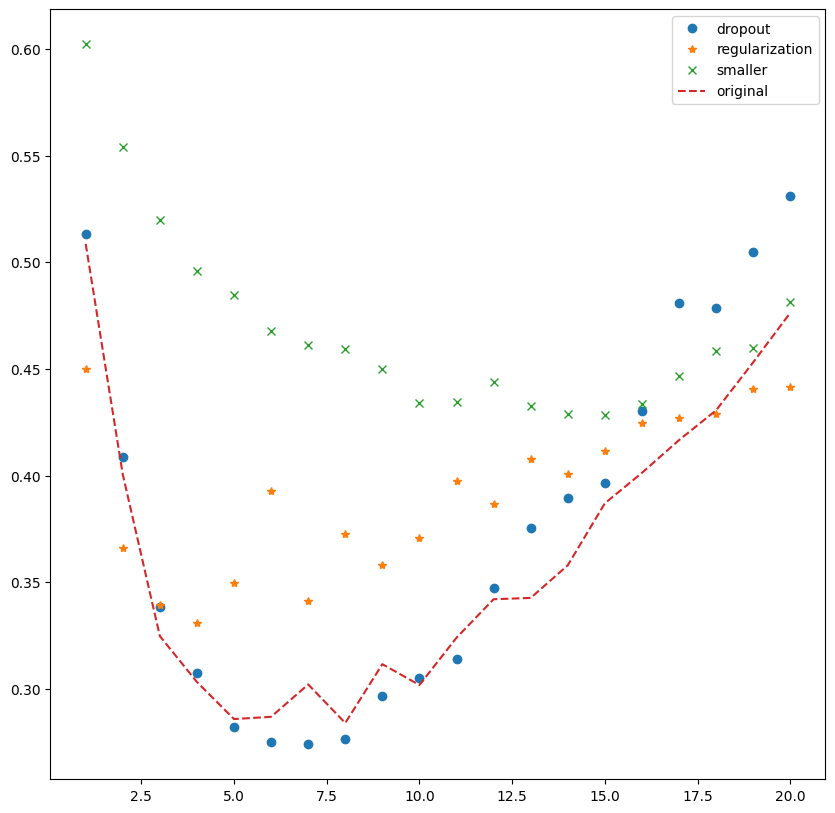

In [24]:
from matplotlib import pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values4 = history4.history['val_loss']
val_loss_values3 = history3.history['val_loss']
val_loss_values2 = history2.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values4, 'o',label='dropout')
plt.plot(epoch,val_loss_values3, '*',label='regularization')
plt.plot(epoch,val_loss_values2, 'x',label='smaller')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

## Probando opciones de Regularizadores

In [27]:
model5 = models.Sequential()
model5.add(layers.Dense(16, activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.l1_l2(0.001,0.001)))
model5.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001,0.001)))
model5.add(layers.Dense(1, activation='sigmoid'))

model5.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

history5 = model5.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 1.1662 - acc: 0.7253 - val_loss: 0.7448 - val_acc: 0.8323
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.7036 - acc: 0.8228 - val_loss: 0.6892 - val_acc: 0.8299
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.6538 - acc: 0.8391 - val_loss: 0.6421 - val_acc: 0.8443
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.6201 - acc: 0.8500 - val_loss: 0.6160 - val_acc: 0.8557
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6060 - acc: 0.8513 - val_loss: 0.6682 - val_acc: 0.8111
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5923 - acc: 0.8541 - val_loss: 0.6000 - val_acc: 0.8592
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5875 - acc: 0.8547 - val_loss: 0.5896 - val_acc: 0.8581
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5755 - a

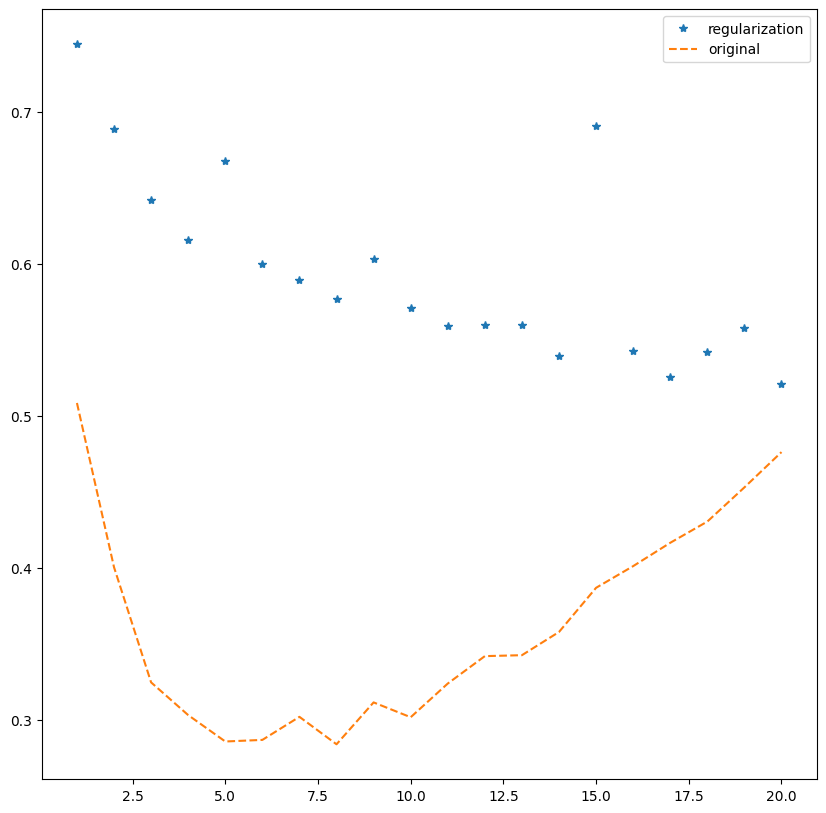

In [28]:

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values5 = history5.history['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values5, '*',label='regularization')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()